# Neural Networks Part 2

## 2 Layer Neural Nets

So, now that we understand what a percptrons. Lets complicate things a little more by now expanding to 2 layers. Show below is the basic 2L NN structure

![](../pics/2l_nn/2l_nn.png)



## Imports

In [20]:
import numpy as np
from tensorflow.keras import activations
import matplotlib.pyplot as plt
import numpy as np

## Creating Inputs

In [21]:
# 9 data points: one x1 x2 y

xy = np.matrix (
[[1.0, 0.0, 0.0, 0.5],
[1.0, 0.0, 0.5, 0.3],
[1.0, 0.0, 1.0, 0.2],
[1.0, 0.5, 0.0, 0.8],
[1.0, 0.5, 0.5, 0.5],
[1.0, 0.5, 1.0, 0.3],
[1.0, 1.0, 0.0, 1.0],
[1.0, 1.0, 0.5, 0.8],
[1.0, 1.0, 1.0, 0.5]]
)

In [22]:
# Taking first 3 columns of xy as matrix
X = xy[:,0:3]

In [23]:
# Taking last column of xy as array
y = np.array(xy[:, 3])

# Squaring y and saving as array
ysq = np.array(y ** 2)

In [24]:
# Concatenating y and ysq as columns to for Y matrix
Y = np.concatenate((y, ysq), axis=1)
Y

array([[0.5 , 0.25],
       [0.3 , 0.09],
       [0.2 , 0.04],
       [0.8 , 0.64],
       [0.5 , 0.25],
       [0.3 , 0.09],
       [1.  , 1.  ],
       [0.8 , 0.64],
       [0.5 , 0.25]])

In [25]:
# Initializing B matrix
B = np.matrix (
[[0.1, 0.1],
[0.2, 0.1],
[0.1, 0.1]]
)

## Testing NN Parts

In [26]:
# Pre-activation matrix
# U = np.dot(X, B)
U = X.dot(B)
U

matrix([[0.1 , 0.1 ],
        [0.15, 0.15],
        [0.2 , 0.2 ],
        [0.2 , 0.15],
        [0.25, 0.2 ],
        [0.3 , 0.25],
        [0.3 , 0.2 ],
        [0.35, 0.25],
        [0.4 , 0.3 ]])

In [27]:
# Predicted value matrix
Y_hat = activations.sigmoid(U)
Y_hat

<tf.Tensor: shape=(9, 2), dtype=float64, numpy=
array([[0.52497919, 0.52497919],
       [0.53742985, 0.53742985],
       [0.549834  , 0.549834  ],
       [0.549834  , 0.53742985],
       [0.5621765 , 0.549834  ],
       [0.57444252, 0.5621765 ],
       [0.57444252, 0.549834  ],
       [0.58661758, 0.5621765 ],
       [0.59868766, 0.57444252]])>

In [28]:
# Negative error matrix
E = Y_hat - Y
E

<tf.Tensor: shape=(9, 2), dtype=float64, numpy=
array([[ 0.02497919,  0.27497919],
       [ 0.23742985,  0.44742985],
       [ 0.349834  ,  0.509834  ],
       [-0.250166  , -0.10257015],
       [ 0.0621765 ,  0.299834  ],
       [ 0.27444252,  0.4721765 ],
       [-0.42555748, -0.450166  ],
       [-0.21338242, -0.0778235 ],
       [ 0.09868766,  0.32444252]])>

In [29]:
# f'(U) * E -> Hadamard Product (element wise multiplication)
# f'(U) will be depend on activation and be different for tanh

# sigmoid -> y_hat(1-y_hat) 

# Correction matrix
Delta = np.multiply(np.multiply(Y_hat,(1-Y_hat)),E)
Delta

array([[ 0.00622921,  0.06857322],
       [ 0.05902482,  0.11123062],
       [ 0.08658971,  0.12619236],
       [-0.06192023, -0.02549884],
       [ 0.01530376,  0.07421388],
       [ 0.06708975,  0.11621873],
       [-0.10403106, -0.11142355],
       [-0.05174468, -0.01915502],
       [ 0.02371077,  0.07931267]])

In [30]:
# Gradients matrix
G = np.transpose(X) * Delta
G

matrix([[ 0.04025205,  0.41966408],
        [-0.12182833,  0.031201  ],
        [ 0.18868219,  0.4048685 ]])

In [31]:
# Eta is learning rate
n = 1

# Updated values matrix
B = B - G 
B

matrix([[ 0.05974795, -0.31966408],
        [ 0.32182833,  0.068799  ],
        [-0.08868219, -0.3048685 ]])

## Putting 2L NN In Loop

In [32]:
# Setting B as new variable so it will not over written in loop
new_params = B

In [33]:
# Lists to hold values for plotting
x_list = []
sse_list = []
rsq_list = []

In [34]:
# Loop version for calulating SST

sst = 0
for column in Y.T:
    # print(np.mean(column))
    for each in column:
        sst = sst + (each - np.mean(column)) ** 2
        
sst

1.4331111111111114

In [35]:
# Condensed version of SST

sst = np.sum(np.subtract(Y, np.mean(Y, axis=0))**2)

sst

1.4331111111111112

In [36]:
# 20 epochs for 2L NN

for i in range(0, 25):
    
    # Pre-activation matrix
    U = np.dot(X, new_params)
    
    # Predicted value matrix
    Y_hat = activations.sigmoid(U)
    
    # Negative error matrix
    E = Y_hat - Y
    
    # Correction matrix
    Delta = np.multiply(np.multiply(Y_hat,(1-Y_hat)),E)
    
    # Gradients matrix
    G = np.transpose(X) * Delta

    # Eta preliminarily set to 1
    n = 1
    
    # Updated values matrix
    new_params = new_params - G 
    
    # Sum of squared errors
    sse = (np.linalg.norm(E)) ** 2
    # sse = np.sum(E ** 2)

    x_list.append(i)
    sse_list.append(sse)
    rsq_list.append(1-sse/sst)


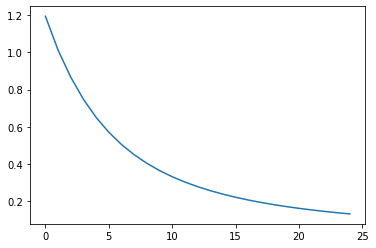

In [37]:
# Plotting sse vs epochs
plt.plot(x_list, sse_list)
plt.show()

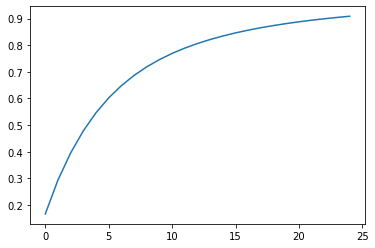

In [38]:
# Plotting rsq vs epochs
plt.plot(x_list, rsq_list)
plt.show()